<a href="https://colab.research.google.com/github/Seong-jieun/netflix_eda/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요
- 넷플릭스의 콘텐츠 제목, 감독, 개봉연도, 설명 등을 포함하는 데이터 세트
- 출처: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/data
- EDA

# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from wordcloud import WordCloud

# 데이터 불러오기

In [9]:
df = pd.read_csv('/content/drive/MyDrive/personal_da_project/netflix_titles.csv')

# 데이터 파악 & 전처리

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 컬럼 설명

- show_id: 작품 고유 식별자
- type: 작품의 카테고리. 'Movie'와 'TV Show'
- title: 제목
- director: 감독
- cast: 출연 배우들
- country: 제작 국가
- date_added: 넷플릭스에 추가된 날짜
- release_year: 개봉 연도
- rating: 영상물 등급
- duration: 영화-작품의 러닝타임(분), 티비쇼-시즌
- listed_in: 장르
- description: 간략한 설명

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## 결측치 처리

- null값 처리 계획
    - director -> Unknown
    - cast -> Unknown
    - country -> Unknown
    - date_added -> 삭제
    - rating -> 삭제
    - duration -> 삭제

In [10]:
# 'director', 'cast', 'country' 컬럼의 결측치를 Unknown으로 대체
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# 결측치 제거
df.dropna(inplace=True)

# 중복값 제거
df.drop_duplicates(inplace=True)

## 날짜 데이터 타입 변경 & 파생변수 생성

In [11]:
# 'date_added'의 공백 제거
df['date_added'] = df['date_added'].str.strip()

# 'date_added' 데이터 타입 변경
df['date_added'] = pd.to_datetime(df['date_added'])

# 연, 월 컬럼 생성 (작품이 넷플릭스에 추가된 연도, 월)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [13]:
# 최종 df 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int32         
 13  month_added   8790 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 995.7+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [14]:
# 데이터 분포 기간 확인
min_date = df['date_added'].min()
max_date = df['date_added'].max()

print(f'{min_date}부터 {max_date}까지의 데이터이다')

2008-01-01 00:00:00부터 2021-09-25 00:00:00까지의 데이터이다


In [ ]:
#df.to_csv('netflix_titles_preprocessed.csv', index=False)

# EDA

## type

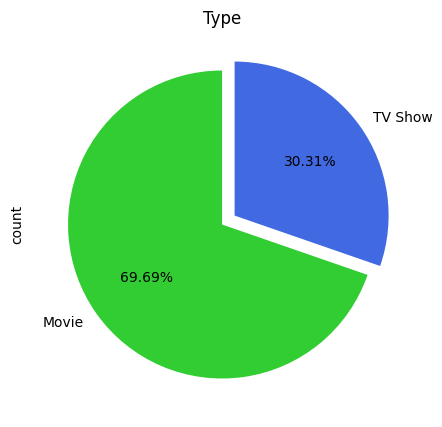

In [16]:
# type별 비율
df['type'].value_counts().plot.pie(figsize=(5, 5), autopct='%1.2f%%', startangle=90, explode=[0, 0.1], colors = ['limegreen', 'royalblue'])
plt.title('Type')
plt.show()

# Movie: 69.69% | TV Show: 30.31%

## director

In [22]:
# 새로운 데이터프레임 생성
# 콤마 기준으로 감독명 분리, type별로 구분
movie_dir = df[df['type'] == 'Movie']['director'].str.split(', ').explode().value_counts()
tv_show_dir = df[df['type'] == 'TV Show']['director'].str.split(', ').explode().value_counts()

# 데이터프레임 생성
df_dir_counts = pd.DataFrame({'Movie': movie_dir, 'TV Show': tv_show_dir})

# 결측값 0으로 대체
df_dir_counts['Movie'] = df_dir_counts['Movie'].fillna(0)
df_dir_counts['TV Show'] = df_dir_counts['TV Show'].fillna(0)

# Total 컬럼 생성
df_dir_counts['Total'] = df_dir_counts['Movie'] + df_dir_counts['TV Show']

# 데이터 타입 변경(float -> int)
df_dir_counts = df_dir_counts.astype(int)

# 내림차순으로 정렬
df_dir_counts = df_dir_counts.sort_values(by='Total', ascending=False)

print(df_dir_counts)

                         Movie  TV Show  Total
director                                      
Unknown                    187     2434   2621
Rajiv Chilaka               22        0     22
Jan Suter                   21        0     21
Raúl Campos                 19        0     19
Marcus Raboy                15        1     16
...                        ...      ...    ...
Brandon Dickerson            1        0      1
Juan Antin                   1        0      1
Juan Antonio de la Riva      1        0      1
Juan Camilo Pinzon           1        0      1
Azazel Jacobs                1        0      1

[4992 rows x 3 columns]


In [67]:
# # df_dir_counts를 csv파일로 저장
# pd.DataFrame(df_dir_counts).to_csv('df_dir_counts.csv', index=False)

In [23]:
# Unknown제외 상위 10명 데이터프레임 생성
df_dir_counts_top10 = df_dir_counts[df_dir_counts.index != 'Unknown'].head(10)

df_dir_counts_top10

,Movie,TV Show,Total
director,,,
Rajiv Chilaka,22,0,22
Jan Suter,21,0,21
Raúl Campos,19,0,19
Marcus Raboy,15,1,16
Suhas Kadav,16,0,16
Jay Karas,15,0,15
Cathy Garcia-Molina,13,0,13
Jay Chapman,12,0,12
Martin Scorsese,12,0,12


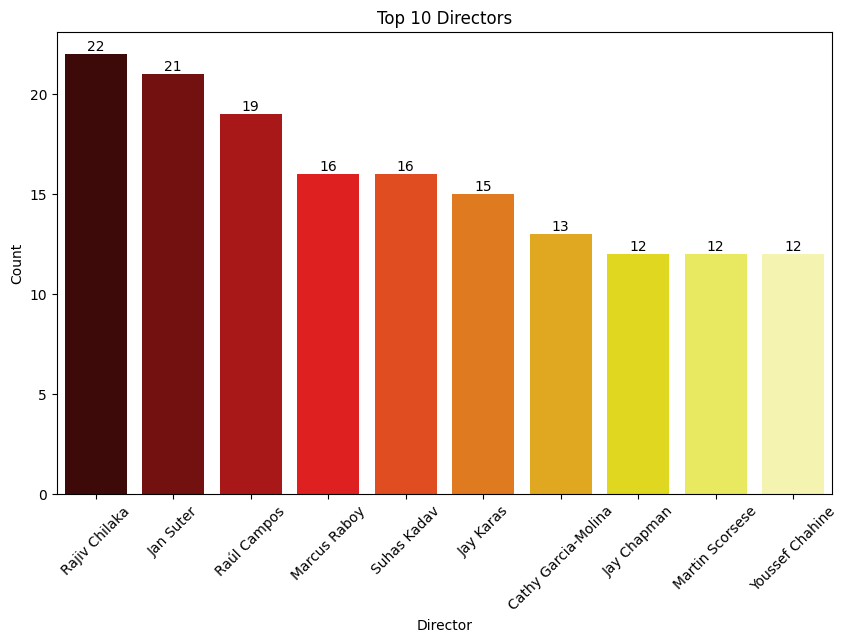

In [28]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_dir_counts_top10, x='director', y='Total', palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country

In [29]:
# 콤마 기준으로 국가 분리, type별로 구분
movie_country = df[df['type'] == 'Movie']['country'].str.split(', ').explode().value_counts()
tv_show_country = df[df['type'] == 'TV Show']['country'].str.split(', ').explode().value_counts()

# 데이터프레임 생성
df_country_counts = pd.DataFrame({'Movie': movie_country, 'TV Show': tv_show_country})

# 결측값 0으로 대체
df_country_counts['Movie'] = df_country_counts['Movie'].fillna(0)
df_country_counts['TV Show'] = df_country_counts['TV Show'].fillna(0)

# Total 컬럼 생성
df_country_counts['Total'] = df_country_counts['Movie'] + df_country_counts['TV Show']

# 데이터 타입 변경(float -> int)
df_country_counts = df_country_counts.astype(int)

# 내림차순으로 정렬
df_country_counts = df_country_counts.sort_values(by='Total', ascending=False)

print(df_country_counts)

                Movie  TV Show  Total
country                              
United States    2748      932   3680
India             962       84   1046
Unknown           439      390    829
United Kingdom    532      271    803
Canada            319      126    445
...               ...      ...    ...
Somalia             1        0      1
Mongolia            1        0      1
Ecuador             1        0      1
East Germany        1        0      1
Ethiopia            1        0      1

[128 rows x 3 columns]


In [66]:
# # df_country_counts를 csv파일로 저장
# pd.DataFrame(df_country_counts).to_csv('df_country_counts.csv', index=False)

In [30]:
# Unknown제외 상위 10개국 데이터프레임 생성
df_country_counts_top10 = df_country_counts[df_country_counts.index != 'Unknown'].head(10)

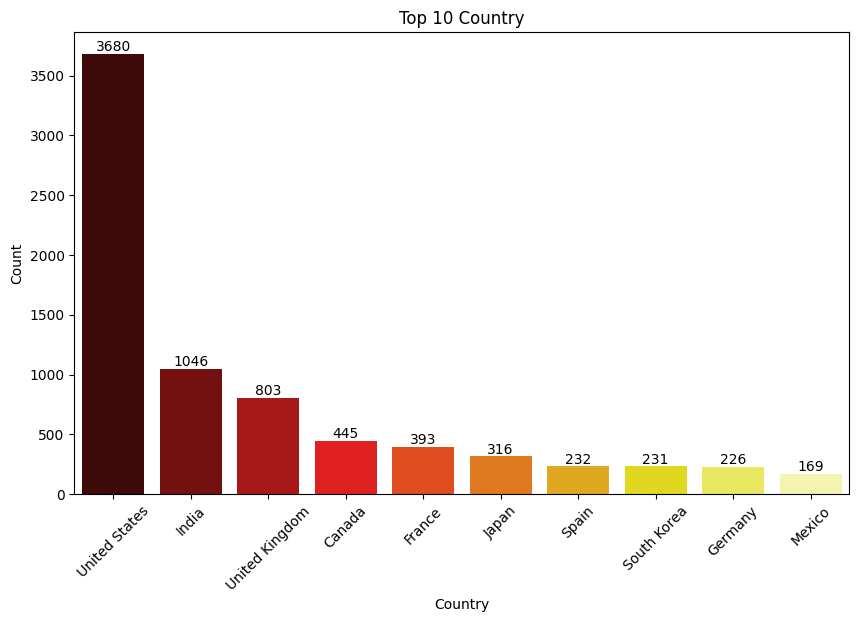

In [31]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_country_counts_top10, x='country', y='Total', palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

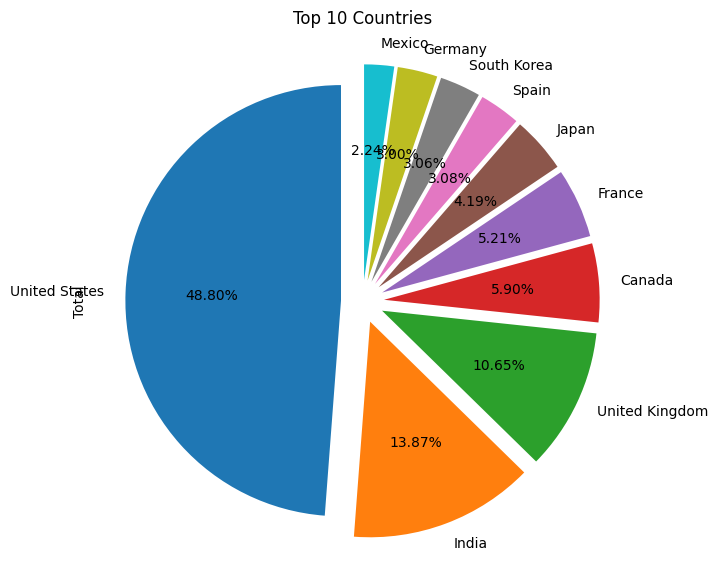

In [57]:
# pieplot으로 표현
df_country_counts_top10.plot.pie(
    y='Total', figsize=(7,7), autopct='%1.2f%%', startangle=90, explode=[0.1] * len(df_country_counts_top10), legend=False)
plt.title('Top 10 Countries')
plt.show()

- 상위 10개국은 미국, 인도, 영국, 캐나다, 프랑스, 일본, 스페인, 한국, 독일, 멕시코이다
- 작품 제작을 제일 많이 한 나라는 미국으로 3680개, 상위 10개국 중 48.80%를 차지한다
- 우리나라는 상위 10개국 중 8위 이며 작품수 231개, 상위 10개국 중 3.06%를 차지한다

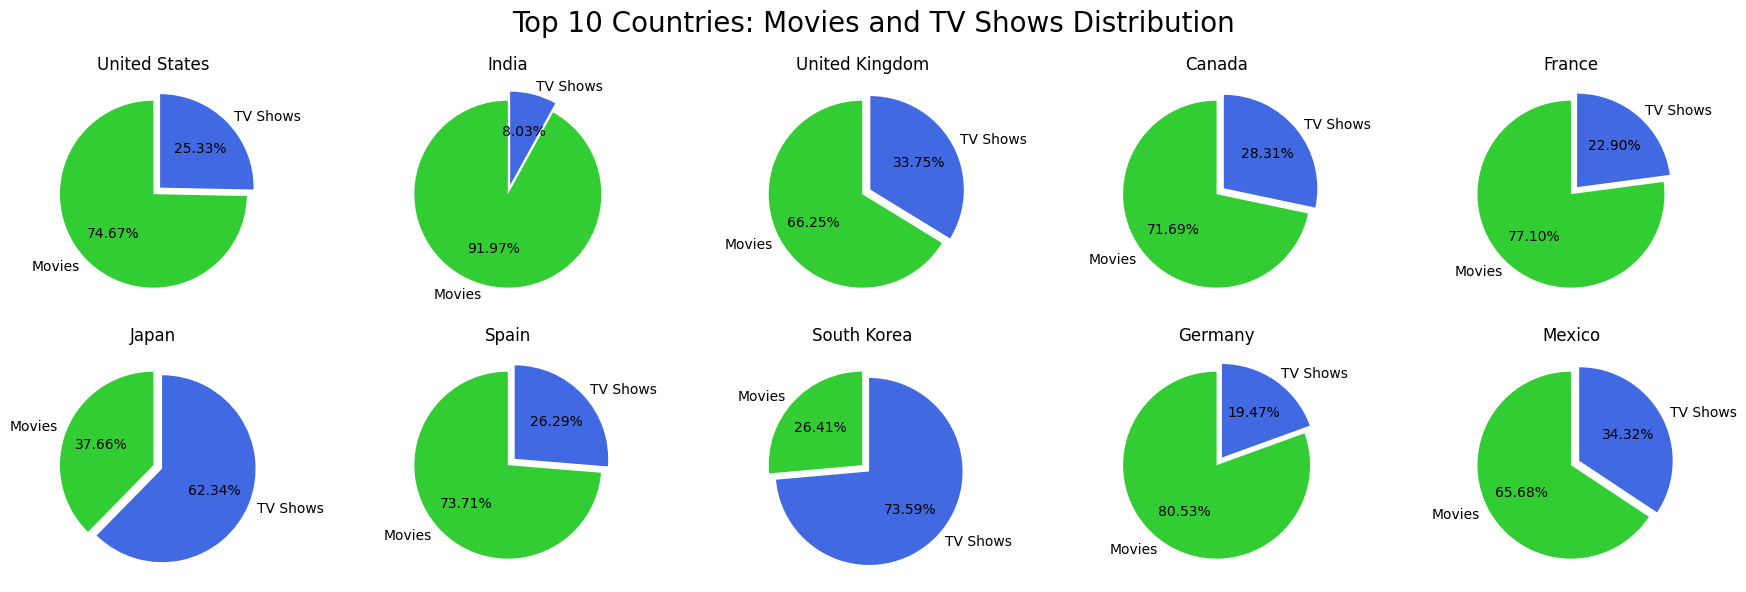

In [39]:
# 국가별 type 분포 시각화
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(18, 6))
fig.suptitle('Top 10 Countries: Movies and TV Shows Distribution', fontsize=20)

for idx, (country, row) in enumerate(df_country_counts_top10.iterrows()):
    ax = axes[idx // 5, idx % 5]
    labels = ['Movies', 'TV Shows']
    sizes = [row['Movie'], row['TV Show']]
    colors = ['limegreen', 'royalblue']
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=[0, 0.1])
    ax.set_title(country)

plt.tight_layout()
plt.show()

- 영화보다 티비쇼의 비중이 높은 나라는 한국과 일본이다
    - 한국은 티비 쇼가 73.59%로 10개국 중 티비 쇼의 비중이 제일 크다
    - 영국은 티비 쇼의 비중이 조금 더 높지만 영화와 비율이 비슷하다
- 그 외 국가들은 영화의 비중이 더 높다
    - 특히 인도는 영화가 91.97%로 영화의 비중이 가장 크다

## release year

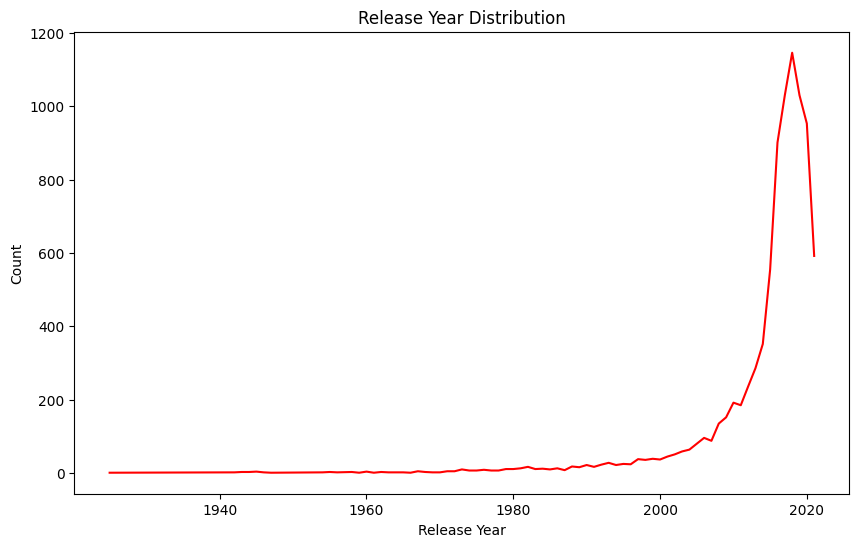

In [96]:
# 개봉 연도별 추이 확인
release_year_dist = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
release_year_dist.plot(kind='line', color='red')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Type별 개봉연도 추이
# 데이터프레임 생성
movie_release_year = df[df['type'] == 'Movie']['release_year'].value_counts()
tv_show_release_year = df[df['type'] == 'TV Show']['release_year'].value_counts()
total_release_year = movie_release_year + tv_show_release_year

df_release_year = pd.DataFrame({'Movie': movie_release_year, 'TV Show': tv_show_release_year, 'Total': total_release_year})
df_release_year.fillna(0, inplace=True)
df_release_year = df_release_year.reset_index()
df_release_year = df_release_year.rename(columns={'index': 'release_year'})

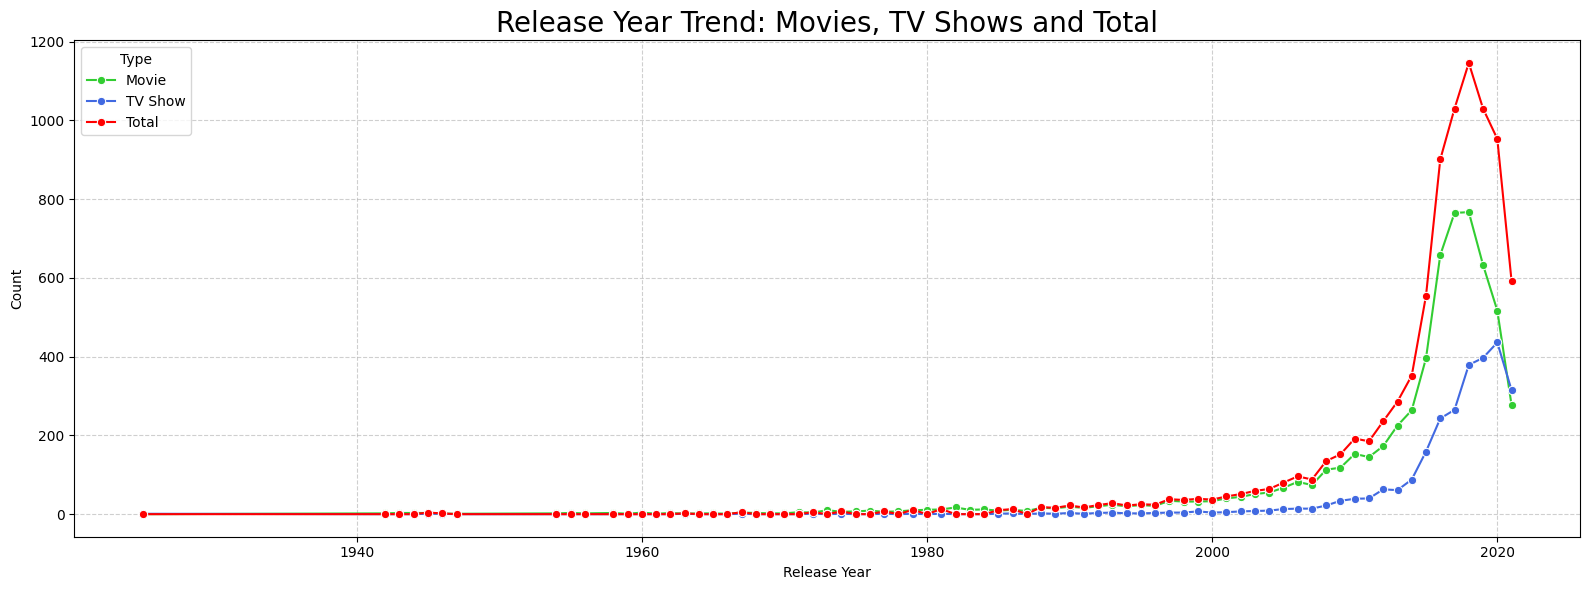

In [ ]:
# 시각화
plt.figure(figsize=(16, 6))

sns.lineplot(data=df_release_year, x='release_year', y='Movie', label='Movie', marker='o', color='limegreen')
sns.lineplot(data=df_release_year, x='release_year', y='TV Show', label='TV Show', marker='o', color='royalblue')
sns.lineplot(data=df_release_year, x='release_year', y='Total', label='Total', marker='o', color='red')

plt.title('Release Year Trend: Movies, TV Shows and Total', fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

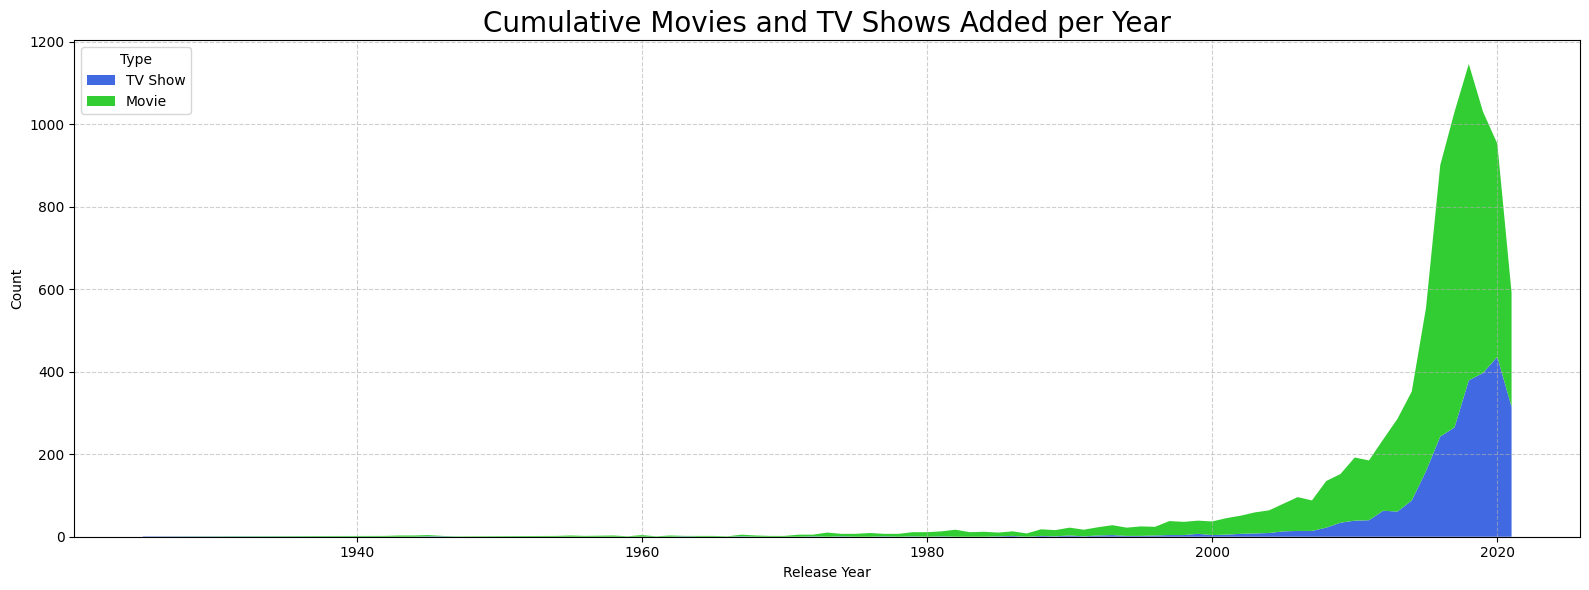

In [ ]:
# 누적 그래프로 표현
plt.figure(figsize=(16, 6))
plt.stackplot(df_release_year['release_year'],  df_release_year['TV Show'], df_release_year['Movie'], labels=['TV Show', 'Movie'], colors=['royalblue', 'limegreen'])

plt.title('Cumulative Movies and TV Shows Added per Year', fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## year_added

In [ ]:
# Type별 넷플릭스에 추가된 연도 추이
# 데이터프레임 생성
movie_year_added = df[df['type'] == 'Movie']['year_added'].value_counts()
tv_show_year_added = df[df['type'] == 'TV Show']['year_added'].value_counts()
total_year_added = movie_year_added + tv_show_year_added

df_year_added = pd.DataFrame({'Movie': movie_year_added, 'TV Show': tv_show_year_added, 'Total': total_year_added})
df_year_added.fillna(0, inplace=True)
df_year_added = df_year_added.reset_index()
df_year_added = df_year_added.rename(columns={'index': 'year_added'})

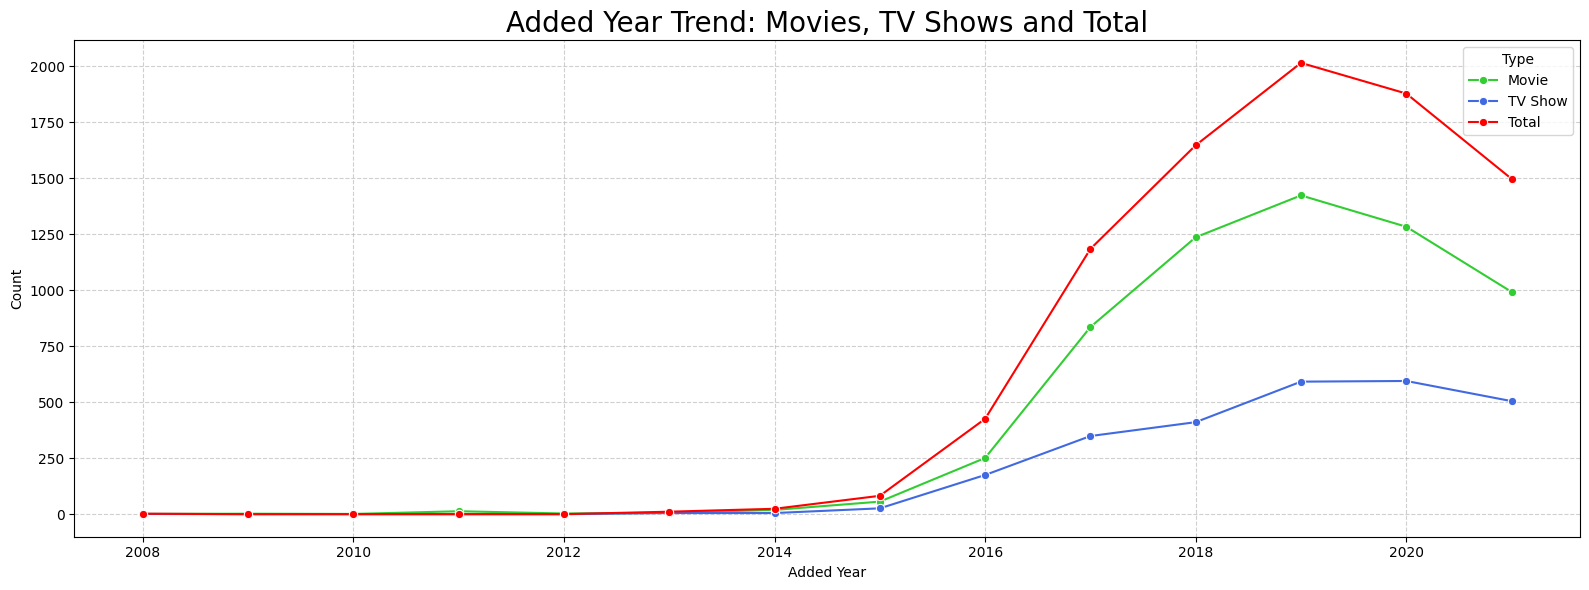

In [ ]:
# 시각화
plt.figure(figsize=(16, 6))

sns.lineplot(data=df_year_added, x='year_added', y='Movie', label='Movie', marker='o', color='limegreen')
sns.lineplot(data=df_year_added, x='year_added', y='TV Show', label='TV Show', marker='o', color='royalblue')
sns.lineplot(data=df_year_added, x='year_added', y='Total', label='Total', marker='o', color='red')

plt.title('Added Year Trend: Movies, TV Shows and Total', fontsize=20)
plt.xlabel('Added Year')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## month_added

In [ ]:
# Type별 넷플릭스에 추가된 월 추이
# 데이터프레임 생성
movie_month_added = df[df['type'] == 'Movie']['month_added'].value_counts()
tv_show_month_added = df[df['type'] == 'TV Show']['month_added'].value_counts()
total_month_added = movie_month_added + tv_show_month_added

df_month_added = pd.DataFrame({'Movie': movie_month_added, 'TV Show': tv_show_month_added, 'Total': total_month_added})
df_month_added.fillna(0, inplace=True)
df_month_added = df_month_added.reset_index()
df_month_added = df_month_added.rename(columns={'index': 'month_added'})

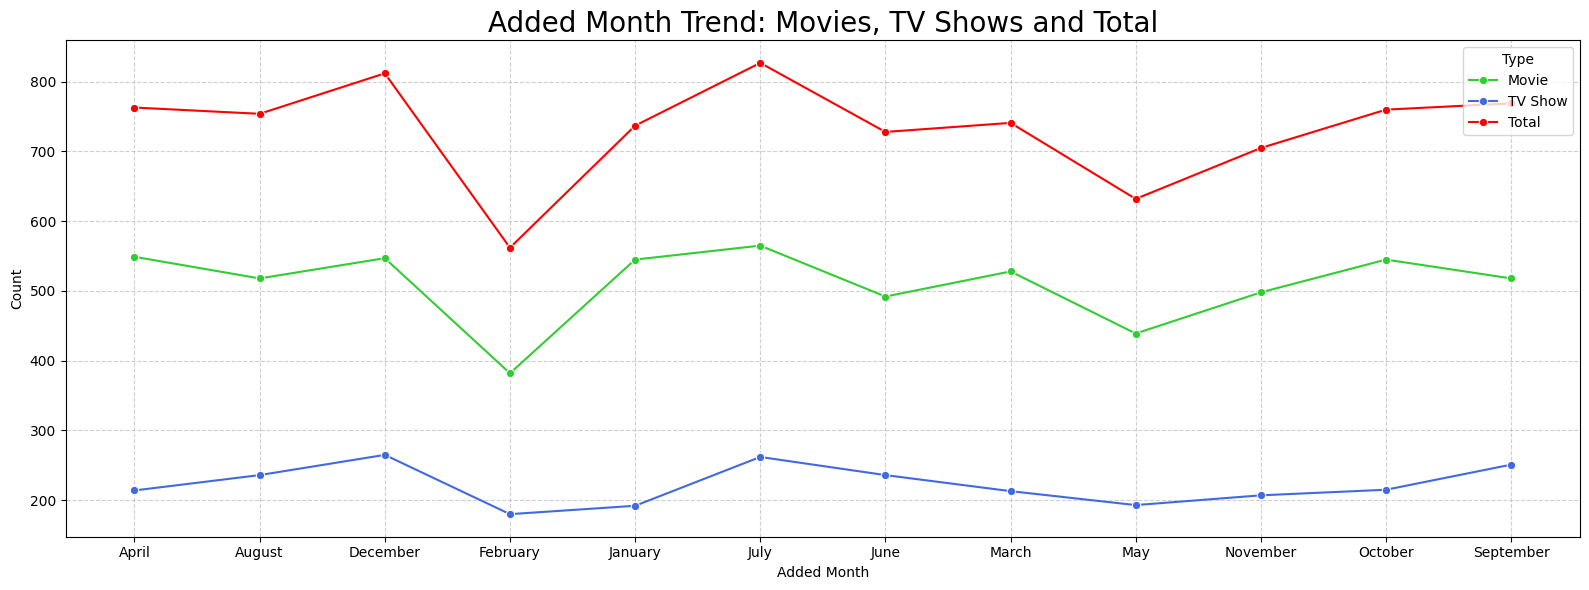

In [ ]:
# 시각화
plt.figure(figsize=(16, 6))

sns.lineplot(data=df_month_added, x='month_added', y='Movie', label='Movie', marker='o', color='limegreen')
sns.lineplot(data=df_month_added, x='month_added', y='TV Show', label='TV Show', marker='o', color='royalblue')
sns.lineplot(data=df_month_added, x='month_added', y='Total', label='Total', marker='o', color='red')

plt.title('Added Month Trend: Movies, TV Shows and Total', fontsize=20)
plt.xlabel('Added Month')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## rating

- 미국 기준 영상물 등급이 기재되어 있다
- 한국 기준과 비교하면 아래와 같다

|미국|한국|
|-|-|
|G|전체 관람가|
|PG|12세 관람가|
|PG-13|15세 관람가|
|R|청소년관람불가|
|NC-17|제한 상영가|
|TV-Y|전체 관람가(주로 만 2~6세 영유아)|
|TV-G|전체 관람가(영유아 대상x)|
|TV-Y7|7세 이상|
|TV-Y7-FV|7세 이상, 가상의 폭력묘사 포함|
|TV-PG|12세 관람가|
|TV-14|15세 관람가|
|TV-MA|청소년관람불가|
|NR|Not Rated|
|UR|Unrated(무삭제판)|



In [ ]:
print(df['rating'].unique(), df['rating'].nunique())

# 영상물 등급 종류: 'PG-13', 'TV-MA, 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'
# 영상물 등급 개수: 14개

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR'] 14


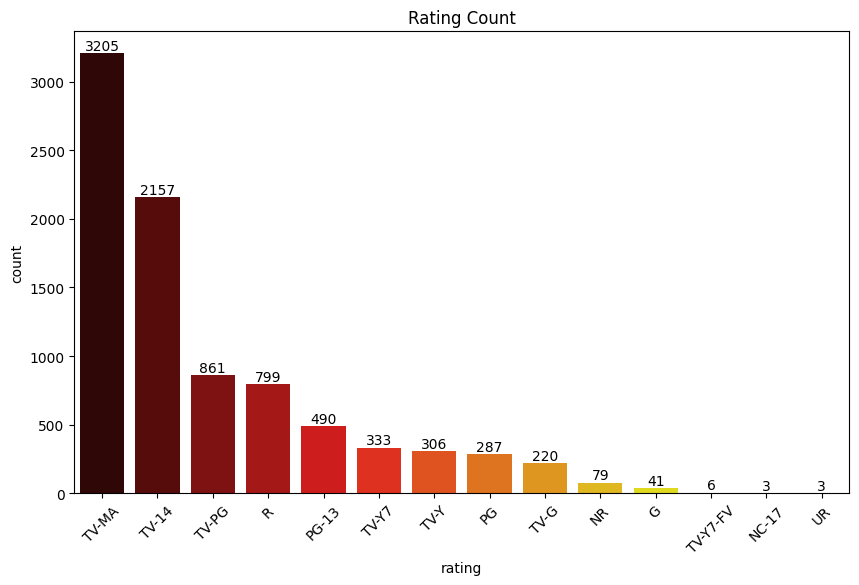

In [60]:
# rating 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts(ascending=False).index, palette='hot')

# count값 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Rating Count')
plt.xticks(rotation=45)
plt.show()

In [98]:
# type별 rating 데이터프레임 생성
movie_rating_counts = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_rating_counts = df[df['type'] == 'TV Show']['rating'].value_counts()

df_rating_counts = pd.DataFrame({'Movie': movie_rating_counts, 'TV Show': tv_show_rating_counts})

print(df_rating_counts)

          Movie  TV Show
rating                  
G            41      NaN
NC-17         3      NaN
NR           75      4.0
PG          287      NaN
PG-13       490      NaN
R           797      2.0
TV-14      1427    730.0
TV-G        126     94.0
TV-MA      2062   1143.0
TV-PG       540    321.0
TV-Y        131    175.0
TV-Y7       139    194.0
TV-Y7-FV      5      1.0
UR            3      NaN


In [99]:
# df_rating_counts의 결측치를 0으로 대체
df_rating_counts['Movie'] = df_rating_counts['Movie'].fillna(0)
df_rating_counts['TV Show'] = df_rating_counts['TV Show'].fillna(0)

# 'Total'컬럼 추가
df_rating_counts['Total'] = df_rating_counts['Movie'] + df_rating_counts['TV Show']

# 데이터 형식 변경
df_rating_counts['Movie'] = df_rating_counts['Movie'].astype(int)
df_rating_counts['TV Show'] = df_rating_counts['TV Show'].astype(int)
df_rating_counts['Total'] = df_rating_counts['Total'].astype(int)

print(df_rating_counts)

          Movie  TV Show  Total
rating                         
G            41        0     41
NC-17         3        0      3
NR           75        4     79
PG          287        0    287
PG-13       490        0    490
R           797        2    799
TV-14      1427      730   2157
TV-G        126       94    220
TV-MA      2062     1143   3205
TV-PG       540      321    861
TV-Y        131      175    306
TV-Y7       139      194    333
TV-Y7-FV      5        1      6
UR            3        0      3


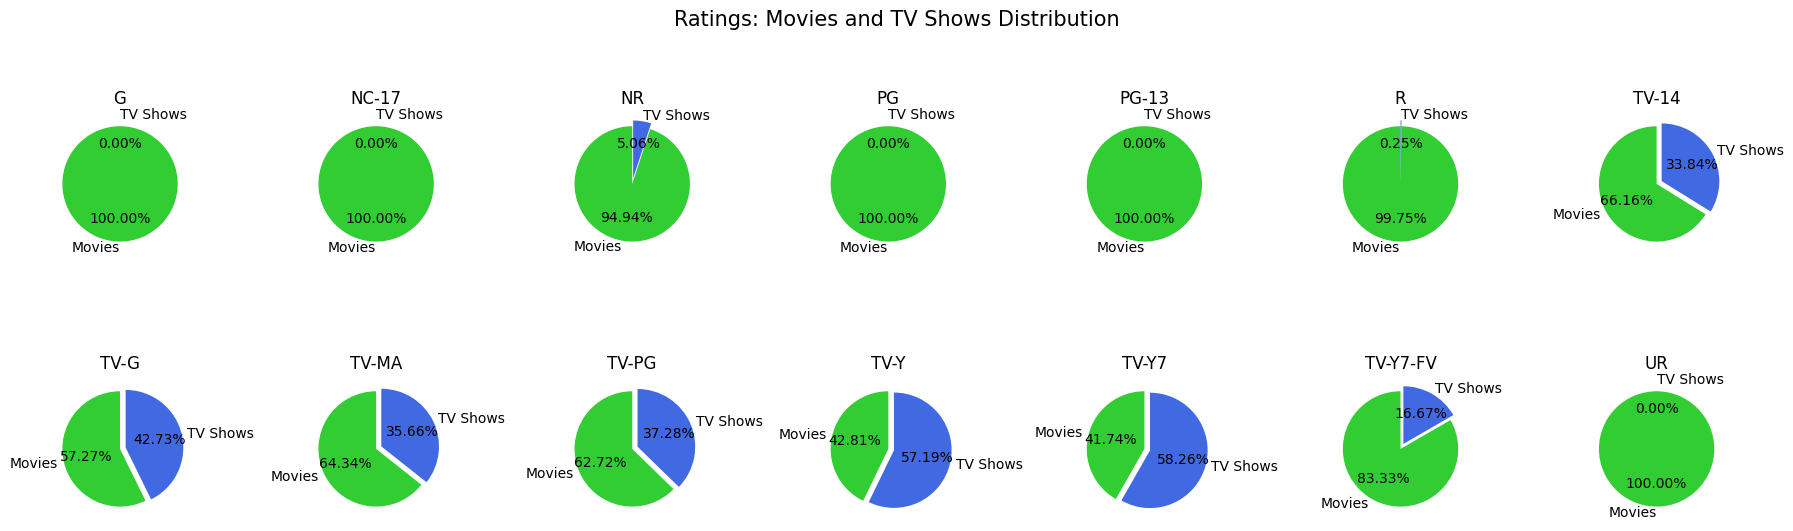

In [63]:
# df_rating_counts 시각화 - pie plot
fig, axes = plt.subplots(nrows = 2, ncols = 7, figsize=(18, 6))
fig.suptitle('Ratings: Movies and TV Shows Distribution', fontsize=15)

for idx, (rating, row) in enumerate(df_rating_counts.iterrows()):
    ax = axes[idx // 7, idx % 7]
    labels = ['Movies', 'TV Shows']
    sizes = [row['Movie'], row['TV Show']]
    colors = ['limegreen', 'royalblue']
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=[0, 0.1])
    ax.set_title(rating)

#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

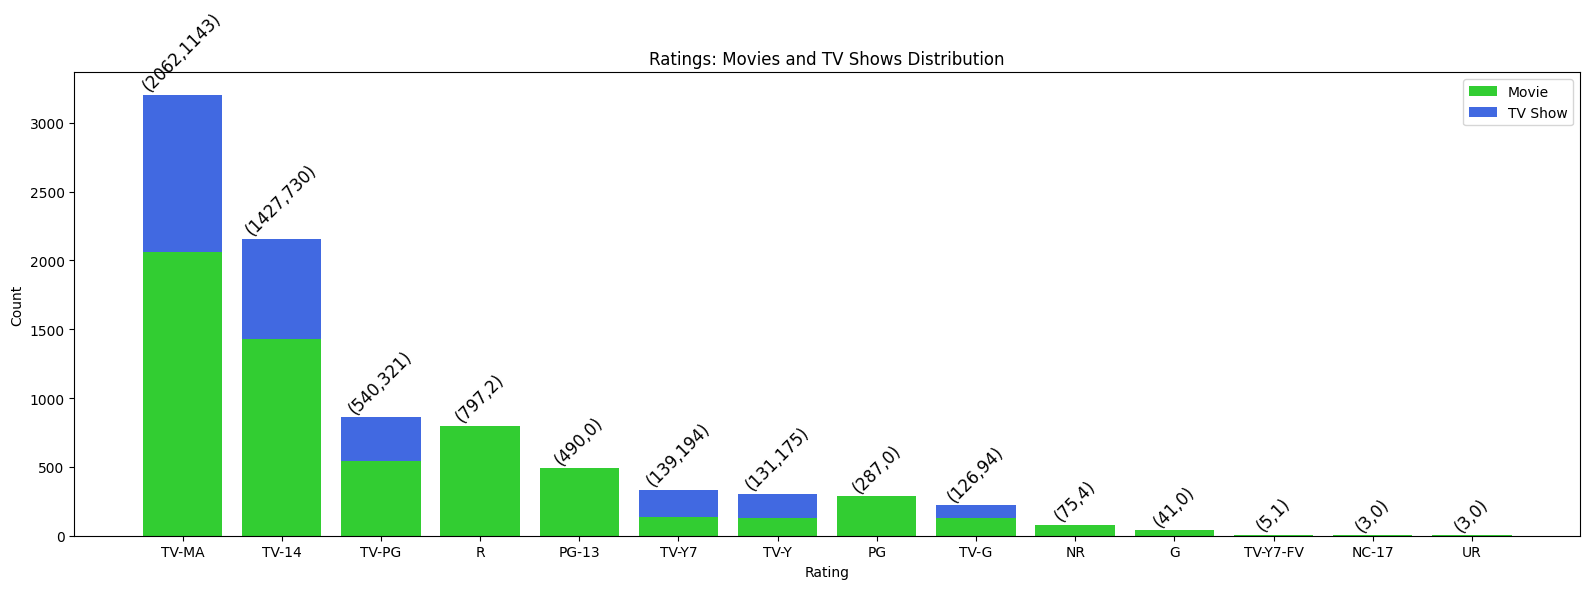

In [108]:
# df_rating_counts 시각화 - bar plot
# 내림차순 정렬
rating_desc = df_rating_counts.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(rating_desc.index, rating_desc['Movie'], label='Movie', color='limegreen')
ax.bar(rating_desc.index, rating_desc['TV Show'], bottom=rating_desc['Movie'], label='TV Show', color='royalblue')

for idx, row in rating_desc.iterrows():
    total_label = f"({int(row['Movie'])},{int(row['TV Show'])})"
    y_pos = row['Movie'] + row['TV Show']   # 바 너비 기준 조정
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=12, rotation=45)

ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Ratings: Movies and TV Shows Distribution')
ax.legend(loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## duration

- 영화와 티비쇼의 duration단위가 다르므로 구분해서 EDA 진행

### Movie

In [ ]:
# Movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

bins = [0, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
labels = ['0-60 min', '61-90 min', '91-120 min', '121-150 min', '151-180 min', '181-210 min', '211-240 min', '241-270 min', '271-300 min', '300+ min']
movies['duration_group'] = pd.cut(movies['duration_minutes'], bins=bins, labels=labels, right=False)

duration_group_counts = movies['duration_group'].value_counts().sort_index()

In [ ]:
# Movie의 평균 duration계산

print(f'Movie의 평균 duration은 {movies["duration_minutes"].mean().round(2)} 분 이다')

Movie의 평균 duration은 99.58 분 이다


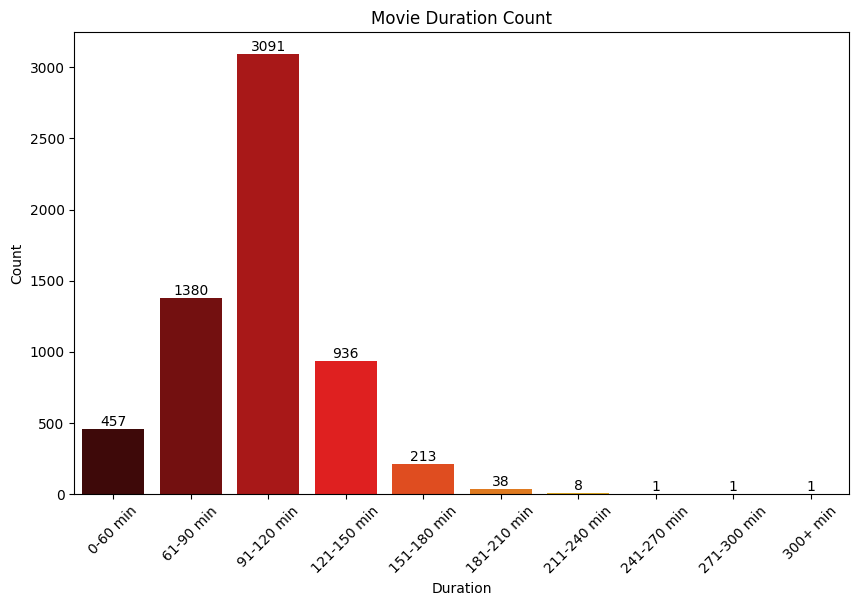

In [ ]:
# Movie - duration 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_group_counts.index, y=duration_group_counts.values, palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Movie Duration Count')
plt.xlabel('Duration')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [ ]:
# duration 짧은 영화순
movies = movies[movies['duration_minutes'] > 0]

short_dur = movies.sort_values(by='duration_minutes').head(10)

for i, row in enumerate(short_dur.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Silent - 3.0 minutes (3 min)
2. Sol Levante - 5.0 minutes (5 min)
3. Cops and Robbers - 8.0 minutes (8 min)
4. Canvas - 9.0 minutes (9 min)
5. American Factory: A Conversation with the Obamas - 10.0 minutes (10 min)
6. Calico Critters: Everyone's Big Dream Flying in the Sky - 11.0 minutes (11 min)
7. Calico Critters: A Town of Dreams - 11.0 minutes (11 min)
8. Cosmos Laundromat: First Cycle - 12.0 minutes (12 min)
9. Besieged Bread - 12.0 minutes (12 min)
10. Zion - 12.0 minutes (12 min)


In [ ]:
# duration 긴 영화순
movies = movies[movies['duration_minutes'] > 0]

long_dur = movies.sort_values(by='duration_minutes',ascending=False).head(10)

for i, row in enumerate(long_dur.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Black Mirror: Bandersnatch - 312.0 minutes (312 min)
2. Headspace: Unwind Your Mind - 273.0 minutes (273 min)
3. The School of Mischief - 253.0 minutes (253 min)
4. No Longer kids - 237.0 minutes (237 min)
5. Lock Your Girls In - 233.0 minutes (233 min)
6. Raya and Sakina - 230.0 minutes (230 min)
7. Once Upon a Time in America - 229.0 minutes (229 min)
8. Sangam - 228.0 minutes (228 min)
9. Lagaan - 224.0 minutes (224 min)
10. Jodhaa Akbar - 214.0 minutes (214 min)


### TV Show

In [64]:
# TV Show
tv_shows = df[df['type'] == 'TV Show']
tv_duration_counts = tv_shows['duration'].value_counts()
tv_duration_counts = pd.DataFrame(tv_duration_counts)
tv_duration_counts.reset_index(inplace=True)
tv_duration_counts.columns = ['duration', 'count']

In [65]:
# TV Show의 평균 duration계산
data = df.drop(columns=[col for col in df.columns if "Unknown" in col])
tv_shows_df = data[data['type'] == 'TV Show'].dropna(subset=['duration']).copy()
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)

average_seasons = tv_shows_df['seasons'].mean().round(2)

print(f'TV Show의 평균 duration은 {average_seasons}season 이다')

TV Show의 평균 duration은 1.75season 이다


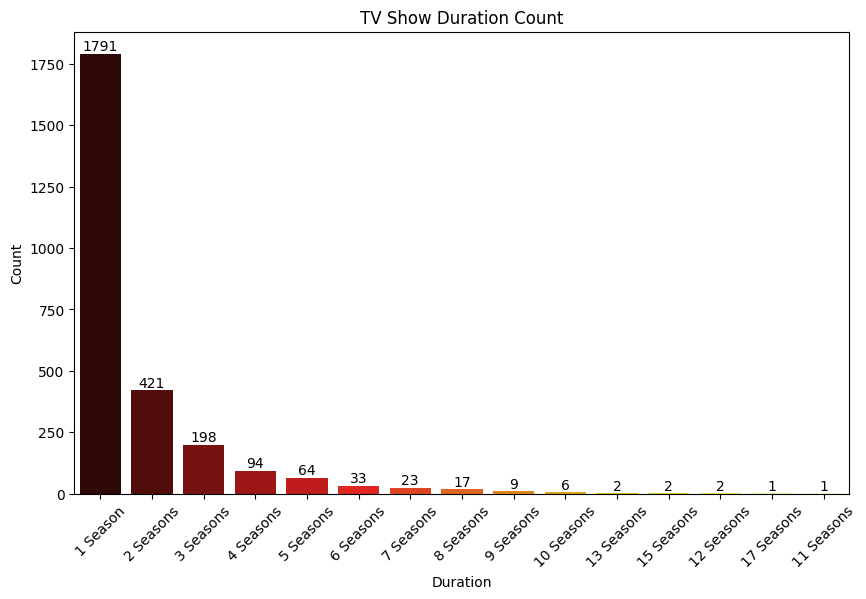

In [ ]:
# TV Show - duration 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=tv_duration_counts, x='duration', y='count', palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('TV Show Duration Count')
plt.xlabel('Duration')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## listed_in

In [70]:
# 콤마 기준으로 장르 분리, type별로 구분
movie_listed = df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts()
tv_show_listed = df[df['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts()

# 데이터프레임 생성
df_list_counts = pd.DataFrame({'Movie': movie_listed, 'TV Show': tv_show_listed})

# 결측값 0으로 대체
df_list_counts['Movie'] = df_list_counts['Movie'].fillna(0)
df_list_counts['TV Show'] = df_list_counts['TV Show'].fillna(0)

# Total 컬럼 생성
df_list_counts['Total'] = df_list_counts['Movie'] + df_list_counts['TV Show']

# 데이터 타입 변경(float -> int)
df_list_counts = df_list_counts.astype(int)

# 내림차순으로 정렬
df_list_counts = df_list_counts.sort_values(by='Total', ascending=False)

print(df_list_counts)

                              Movie  TV Show  Total
listed_in                                          
International Movies           2752        0   2752
Dramas                         2426        0   2426
Comedies                       1674        0   1674
International TV Shows            0     1349   1349
Documentaries                   869        0    869
Action & Adventure              859        0    859
TV Dramas                         0      762    762
Independent Movies              756        0    756
Children & Family Movies        641        0    641
Romantic Movies                 616        0    616
Thrillers                       577        0    577
TV Comedies                       0      573    573
Crime TV Shows                    0      469    469
Kids' TV                          0      448    448
Docuseries                        0      394    394
Music & Musicals                375        0    375
Romantic TV Shows                 0      370    370
Horror Movie

In [71]:
# # df_list_counts csv파일로 저장
# pd.DataFrame(df_list_counts).to_csv('df_list_counts.csv', index=False)

### 전체 (Movie + TV Show)

In [77]:
# Unknown제외 상위 10개 장르 데이터프레임 생성
df_list_counts_top10 = df_list_counts[df_list_counts.index != 'Unknown'].head(10)

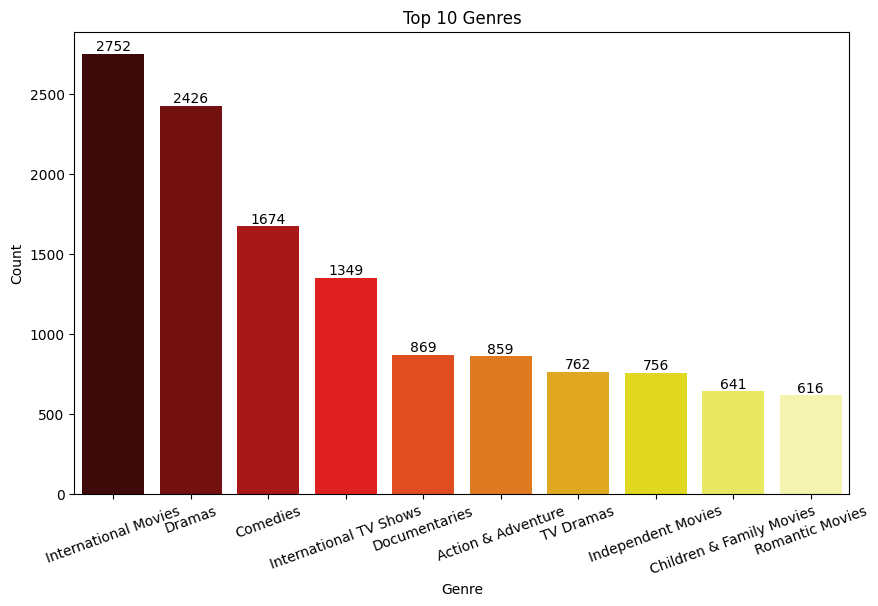

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_list_counts_top10, x=df_list_counts_top10.index, y='Total', palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

In [80]:
print(df_list_counts_top10)

                          Movie  TV Show  Total
listed_in                                      
International Movies       2752        0   2752
Dramas                     2426        0   2426
Comedies                   1674        0   1674
International TV Shows        0     1349   1349
Documentaries               869        0    869
Action & Adventure          859        0    859
TV Dramas                     0      762    762
Independent Movies          756        0    756
Children & Family Movies    641        0    641
Romantic Movies             616        0    616


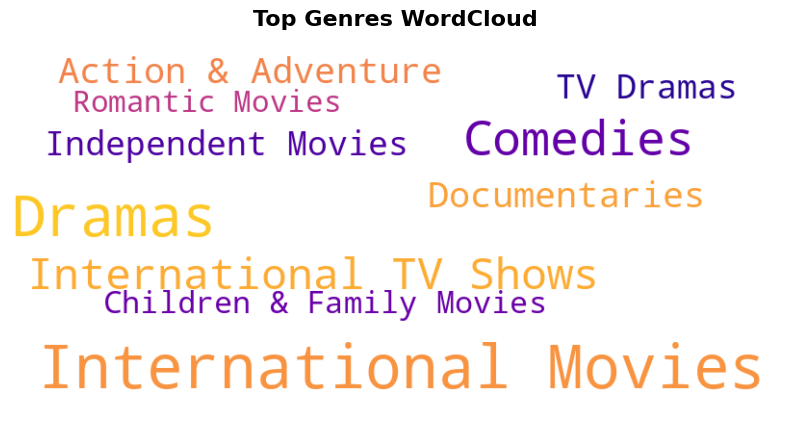

In [81]:
# 워드클라우드로 표현
# df_list_counts_top10를 딕셔너리로 변환
data = {
    "International Movies": 2752,
    "Dramas": 2426,
    "Comedies": 1674,
    "International TV Shows": 1349,
    "Documentaries": 869,
    "Action & Adventure": 859,
    "TV Dramas": 762,
    "Independent Movies": 756,
    "Children & Family Movies": 641,
    "Romantic Movies": 616,
}

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Genres WordCloud", fontsize=16, weight="bold")
plt.show()

### Movie

In [88]:
# Movie - 상위 장르 10개 데이터프레임 생성
movie_genres = df_list_counts[df_list_counts.index != 'Unknown'].sort_values(by='Movie', ascending=False).head(10)
movie_genres = movie_genres.drop(columns=['TV Show', 'Total'])
movie_genres

,Movie
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


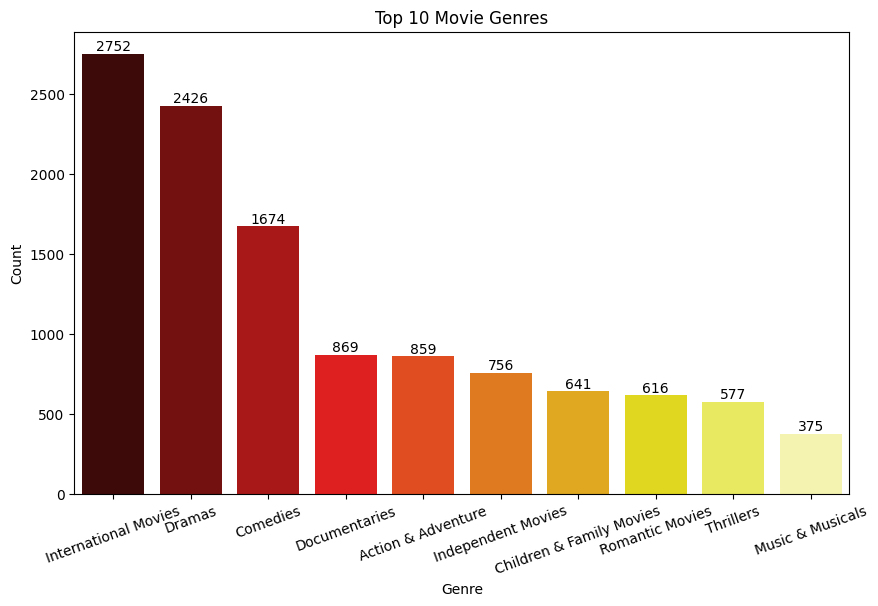

In [90]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_genres.index, y=movie_genres['Movie'], palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

In [91]:
print(movie_genres)

                          Movie
listed_in                      
International Movies       2752
Dramas                     2426
Comedies                   1674
Documentaries               869
Action & Adventure          859
Independent Movies          756
Children & Family Movies    641
Romantic Movies             616
Thrillers                   577
Music & Musicals            375


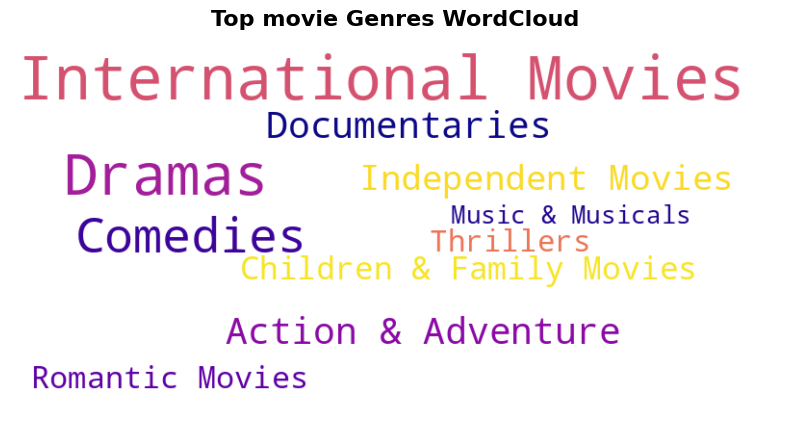

In [ ]:
# 워드클라우드
# movie_genres를 딕셔너리로 변환
data = {
    "International Movies": 2752,
    "Dramas": 2426,
    "Comedies": 1674,
    "Documentaries": 869,
    "Action & Adventure": 859,
    "Independent Movies": 756,
    "Children & Family Movies": 641,
    "Romantic Movies": 616,
    "Thrillers": 577,
    "Music & Musicals": 375
}

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top movie Genres WordCloud", fontsize=16, weight="bold")
plt.show()

### TV Show

In [92]:
# TV Show - 상위 장르 10개 데이터프레임 생성
tv_show_genres = df_list_counts[df_list_counts.index != 'Unknown'].sort_values(by='TV Show', ascending=False).head(10)
tv_show_genres = tv_show_genres.drop(columns=['Movie', 'Total'])
tv_show_genres

,TV Show
listed_in,
International TV Shows,1349
TV Dramas,762
TV Comedies,573
Crime TV Shows,469
Kids' TV,448
Docuseries,394
Romantic TV Shows,370
Reality TV,255
British TV Shows,252


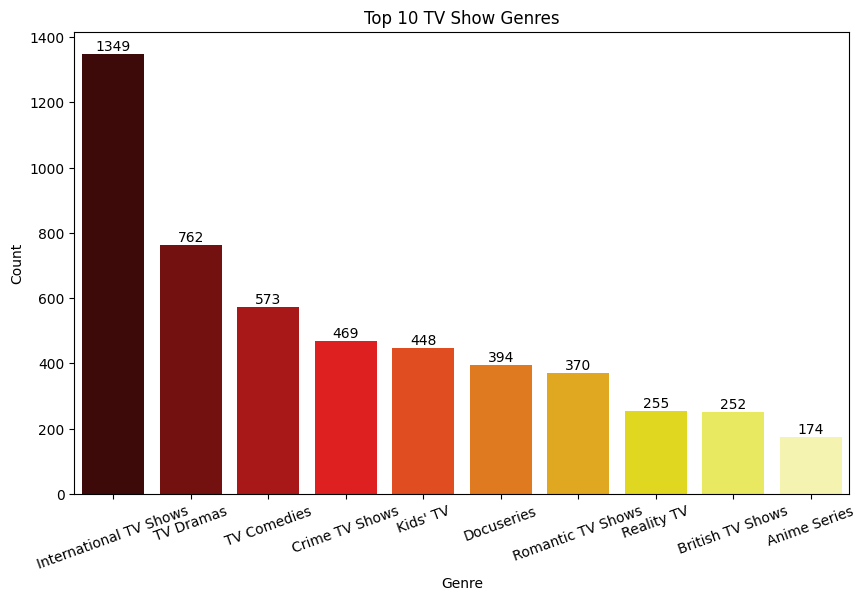

In [93]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=tv_show_genres.index, y=tv_show_genres['TV Show'], palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 TV Show Genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

In [94]:
print(tv_show_genres)

                        TV Show
listed_in                      
International TV Shows     1349
TV Dramas                   762
TV Comedies                 573
Crime TV Shows              469
Kids' TV                    448
Docuseries                  394
Romantic TV Shows           370
Reality TV                  255
British TV Shows            252
Anime Series                174


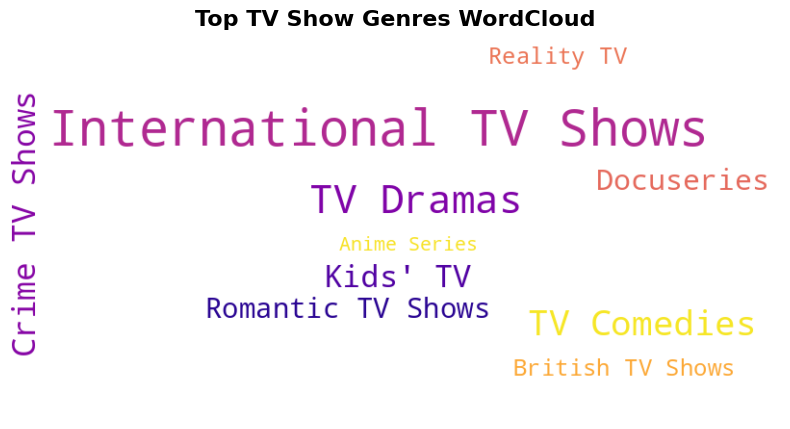

In [ ]:
# 워드클라우드
# tv_show_genres를 딕셔너리로 변환
data = {
    "International TV Shows": 1349,
    "TV Dramas": 762,
    "TV Comedies": 573,
    "Crime TV Shows": 469,
    "Kids' TV": 448,
    "Docuseries": 394,
    "Romantic TV Shows": 370,
    "Reality TV": 255,
    "British TV Shows": 252,
    "Anime Series": 174
}

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top TV Show Genres WordCloud", fontsize=16, weight="bold")
plt.show()